# Basic object detection

In [57]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Load images
image1 = cv2.imread('../data/contours.png')
image2 = cv2.imread('../data/sudoku.jpg')
image3 = cv2.imread('../data/beer_cans.jpg')

### Contour detection

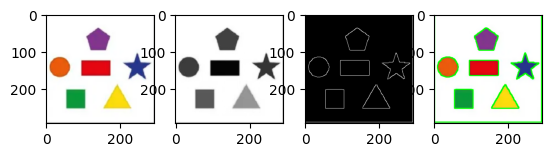

In [59]:
# Converting RGB image to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Calculate the contours from binary image
canny = cv2.Canny(gray, 50, 200)

# Find contours
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw contours
with_contours = cv2.drawContours(image1.copy(), contours, -1, (0, 255, 0), 2)

# Show
plt.subplot(1, 4, 1)
plt.imshow(image1)
plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(canny, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(with_contours)
plt.show()


### Line detection

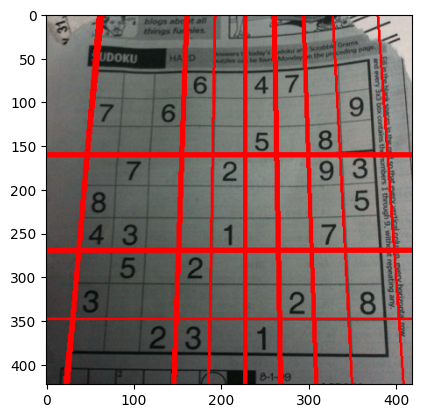

In [60]:
# Converting RGB image to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute edges
canny = cv2.Canny(gray, 50, 200)

# Search Houghlines
lines = cv2.HoughLines(canny, 1, np.pi/180, 200)

# Run for loop through each line
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x_1 = int(x0 + 1000 * (-b))
    y_1 = int(y0 + 1000 * (a))
    x_2 = int(x0 - 1000 * (-b))
    y_2 = int(y0 - 1000 * (a))
    cv2.line(image2, (x_1, y_1), (x_2, y_2), (255, 0, 0), 2)
    
# Show Final output
plt.imshow(image2)
plt.show()

### Circle detection

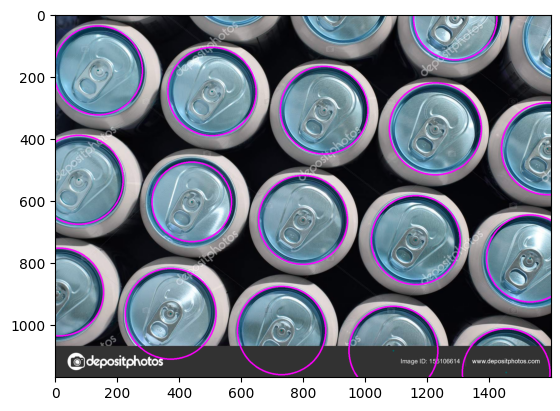

In [61]:
# Converting RGB image to grayscale
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Calculate the contours from binary image
canny = cv2.Canny(gray, 50, 200)

# Search Houghlines
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=120, maxRadius=150)

# Run for loop through each line
for circle in circles[0, :]:
    center = (int(circle[0]), int(circle[1]))
    cv2.circle(image3, center, 1, (0, 100, 100), 3)
    radius = int(circle[2])
    cv2.circle(image3, center, radius, (255, 0, 255), 3)
    
# Show Final output
plt.imshow(image3)
plt.show()